<center><h1>Singaravelou_Ritika_HW8</h1></center>

### Note : I have used two late days for this assignment. I have previously used four late days (one for HW3 , one for HW6 and two for HW7). I kindly request you to consider the same while evaluating my assignment and not deduct any marks. Thank you!

Name: Ritika Singaravelou
<br>
Github Username: ritika-singaravelou 
<br>
USC ID: 6144091011

## 1. Supervised, Semi-Supervised, and Unsupervised Learning

Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold 
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score, hamming_loss, silhouette_samples
from sklearn.metrics import roc_curve, auc, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler,Normalizer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.exceptions import ConvergenceWarning
from sklearn.cluster import KMeans, SpectralClustering
from scipy.special import softmax
from sklearn.neighbors import KNeighborsClassifier
import random
import os
import math
import warnings
warnings.filterwarnings('ignore')

### (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set

####  Download the Breast Cancer Wisconsin (Diagnostic) Data Set from:https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29. Download the data in https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data, which has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has two output classes.

In [2]:
breastcancer_df = pd.read_csv("../data/wdbc.data", header=None)
breastcancer_df.columns = ["id" if c == 0 else "label" if c == 1 else "feature" + str(i - 1) for i, c in enumerate(breastcancer_df.columns)]
breastcancer_df['label'] = breastcancer_df['label'].replace({'B': 0, 'M': 1})
breastcancer_df


,id,label,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### (b) Monte-Carlo Simulation

#### Monte-Carlo Simulation: Repeat the following procedures for supervised, unsupervised, and semi-supervised learning M = 30 times, and use randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). Then compare the average scores (accuracy, precision, recall, F1-score, and AUC) that you obtain from each algorithm.

In [3]:
def split_df(data, test_size=0.2, random_state=0):

    np.random.seed(random_state)
    benign_indices = np.where(data['label'] == 0)[0] 
    num_benign = round(len(benign_indices) * test_size)
    test_benign = np.random.choice(benign_indices, num_benign, replace=False) 
    malignant_indices = np.where(data['label'] == 1)[0]
    num_malignant = round(len(malignant_indices) * test_size)
    test_malignant = np.random.choice(malignant_indices, num_malignant, replace=False) 
    test_indices = np.concatenate([test_benign, test_malignant]) 
    train_indices_set = set(range(data.shape[0])) - set(test_indices)
    train_indices=np.array(list(train_indices_set))
    #train_idxs_lst = list(train_idxs_set)
    #train_idxs_comp = np.array(train_idxs_lst)
    train_x = data.iloc[train_indices, 2:].copy()
    train_y = data.iloc[train_indices, 1].copy()
    test_x = data.iloc[test_indices, 2:].copy()
    test_y = data.iloc[test_indices, 1].copy()
    
    return train_x, train_y, test_x,test_y

In [4]:
train_x,train_y,test_x,test_y=split_df(breastcancer_df)

In [5]:
train_x

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.3784,0.1932,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [6]:
train_y.value_counts()

label
0    286
1    170
Name: count, dtype: int64

In [7]:
test_x

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30
49,13.490,22.30,86.91,561.0,0.08752,0.07698,0.04751,0.033840,0.1809,0.05718,...,15.15,31.82,99.00,698.8,0.1162,0.17110,0.228200,0.128200,0.2871,0.06917
285,12.580,18.40,79.83,489.0,0.08393,0.04216,0.00186,0.002924,0.1697,0.05855,...,13.50,23.08,85.56,564.1,0.1038,0.06624,0.005579,0.008772,0.2505,0.06431
495,14.870,20.21,96.12,680.9,0.09587,0.08345,0.06824,0.049510,0.1487,0.05748,...,16.01,28.48,103.90,783.6,0.1216,0.13880,0.170000,0.101700,0.2369,0.06599
391,8.734,16.84,55.27,234.3,0.10390,0.07428,0.00000,0.000000,0.1985,0.07098,...,10.17,22.80,64.01,317.0,0.1460,0.13100,0.000000,0.000000,0.2445,0.08865
187,11.710,17.19,74.68,420.3,0.09774,0.06141,0.03809,0.032390,0.1516,0.06095,...,13.01,21.39,84.42,521.5,0.1323,0.10400,0.152100,0.109900,0.2572,0.07097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,18.490,17.52,121.30,1068.0,0.10120,0.13170,0.14910,0.091830,0.1832,0.06697,...,22.75,22.88,146.40,1600.0,0.1412,0.30890,0.353300,0.166300,0.2510,0.09445
352,25.730,17.46,174.20,2010.0,0.11490,0.23630,0.33680,0.191300,0.1956,0.06121,...,33.13,23.58,229.30,3234.0,0.1530,0.59370,0.645100,0.275600,0.3690,0.08815
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.149600,0.2395,0.07398,...,26.68,33.48,176.50,2089.0,0.1491,0.75840,0.678000,0.290300,0.4098,0.12840
91,15.370,22.76,100.20,728.2,0.09200,0.10360,0.11220,0.074830,0.1717,0.06097,...,16.43,25.84,107.50,830.9,0.1257,0.19970,0.284600,0.147600,0.2556,0.06828


In [8]:
test_y.value_counts()

label
0    71
1    42
Name: count, dtype: int64

In [9]:
def normalize(train, test):

    train_normalized = Normalizer().fit_transform(train)
    test_normalized = Normalizer().fit_transform(test)
    return train_normalized, test_normalized

In [10]:
def roc(true, pred, prob, dataset):
    
    fig_plt, axes = plt.subplots(figsize=(7, 6))
    fpr, tpr, _ = roc_curve(true, prob, pos_label=1) 
    roc_auc = auc(fpr, tpr)
    axes.plot(fpr, tpr, label=f"ROC Curve Area(Test) = {roc_auc}")
    axes.plot([0, 1], [0, 1], "--")
    axes.set_xlabel("False Positive Rate")
    axes.set_ylabel("True Positive Rate")
    axes.set_title("ROC Curve " + dataset+" Set")
    axes.legend()
    plt.show()
    

def conf_matrix(true, pred,dataset):
    print("Confusion Matrix for "+dataset+" Data")
    mat = confusion_matrix(true, pred)
    print(mat)
    print()
    print("Accuracy:", accuracy_score(true, pred))
    

def summarize_results(ytrain, ypred_train, ypred_train_prob, ytest, ypred_test, ypred_test_prob, result_train, result_test):
    
    print("Confusion Matrix and ROC for Train and Test Sets")
    conf_matrix(ytrain, ypred_train, 'Train')
    roc(ytrain, ypred_train, ypred_train_prob, 'Train')
    conf_matrix(ytest, ypred_test, 'Test')
    roc(ytest, ypred_test, ypred_test_prob, 'Test')
    print("Average Scores:")
    summary = pd.concat([result_train.agg('mean'), result_test.agg('mean')], axis=1)
    summary.columns = ['Train', 'Test']
    return summary

  
def get_metrics(true, pred, prob):
    
    classificationreport = classification_report(true, pred, output_dict=True)
    fpr, tpr, _ = roc_curve(true, prob, pos_label=1)
    roc_auc = auc(fpr, tpr)
    report_dict = {
        "Average Accuracy": classificationreport["accuracy"],
        "Average Precision": classificationreport["weighted avg"]["precision"],
        "Average Recall": classificationreport["weighted avg"]["recall"],
        "Average F1-score": classificationreport["weighted avg"]["f1-score"],
        "AUC": roc_auc
    }
    return report_dict, classificationreport  
    

In [11]:
def linearsvc(train_x, train_y, args):
    model = GridSearchCV(LinearSVC(penalty='l1', dual=False), **args) 
    model.fit(train_x, train_y)
    return model

def svm(df, range_, params_grid, alg):
    args = {
        'param_grid' : params_grid, 
        'scoring' : 'f1_weighted',
        'n_jobs' : -1,
        'verbose' : 0
    }

    result_cols = ["Average Accuracy", "Average Precision", "Average Recall", "Average F1-score", "AUC"]
    result_train = pd.DataFrame(columns=result_cols)
    result_test = pd.DataFrame(columns=result_cols)

    for i in range(range_):
        train_x, train_y, test_x, test_y = split_df(breastcancer_df, random_state=i)
        train_x_normalized, test_x_normalized = normalize(train_x, test_x)

        if alg == 'supervised':
            args['cv'] = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)
            model_cv = linearsvc(train_x_normalized, train_y, args)
        elif alg == 'semisupervised':
            model_cv = semi_supervised(train_x_normalized, train_y, args)
        
        ypred_train_prob = model_cv.decision_function(train_x_normalized) 
        ypred_train = model_cv.predict(train_x_normalized) 
        result_train_vals, report_train = get_metrics(train_y, ypred_train, ypred_train_prob)
        #result_train = result_train.append(result_train_vals, ignore_index=True)
        result_train = pd.concat([result_train, pd.DataFrame([result_train_vals])], ignore_index=True)
        accuracy_train = report_train["accuracy"]
        
        ypred_test_prob = model_cv.decision_function(test_x_normalized) 
        ypred_test = model_cv.predict(test_x_normalized)
        result_test_vals, report_test = get_metrics(test_y, ypred_test, ypred_test_prob)
        #result_test = result_test.append(result_test_vals, ignore_index=True)
        result_test = pd.concat([result_test, pd.DataFrame([result_test_vals])], ignore_index=True)
        accuracy_test = report_test["accuracy"]

        optimal_c = model_cv.best_params_ 

        print("Iteration Number: " + str(i+1))
        print("Accuracy Score for Train Set:",accuracy_train)
        print("Accuracy Score for Test Set:",accuracy_test)
        print("Optimal C:", optimal_c)
        print()
    summary = summarize_results(train_y, ypred_train, ypred_train_prob, test_y, ypred_test, ypred_test_prob, result_train, result_test)
    display(summary)

    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning)
    return summary

In [12]:
potential_c_1b1 = np.logspace(np.log10(10 ** -2), np.log10(10 ** 7), 20)
params_grid_1b1 = {
    "C": potential_c_1b1
}


### (i) Supervised Learning

#### Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

Iteration Number: 1
Accuracy Score for Train Set: 0.9956140350877193
Accuracy Score for Test Set: 0.9646017699115044
Optimal C: {'C': 127427.49857031321}

Iteration Number: 2
Accuracy Score for Train Set: 0.9758771929824561
Accuracy Score for Test Set: 0.9557522123893806
Optimal C: {'C': 1623.776739188721}

Iteration Number: 3
Accuracy Score for Train Set: 0.9758771929824561
Accuracy Score for Test Set: 0.9203539823008849
Optimal C: {'C': 1623.776739188721}

Iteration Number: 4
Accuracy Score for Train Set: 0.9890350877192983
Accuracy Score for Test Set: 0.9646017699115044
Optimal C: {'C': 14384.498882876629}

Iteration Number: 5
Accuracy Score for Train Set: 0.9978070175438597
Accuracy Score for Test Set: 0.9557522123893806
Optimal C: {'C': 42813.32398719387}

Iteration Number: 6
Accuracy Score for Train Set: 0.9868421052631579
Accuracy Score for Test Set: 0.9469026548672567
Optimal C: {'C': 14384.498882876629}

Iteration Number: 7
Accuracy Score for Train Set: 0.9780701754385965
Accu

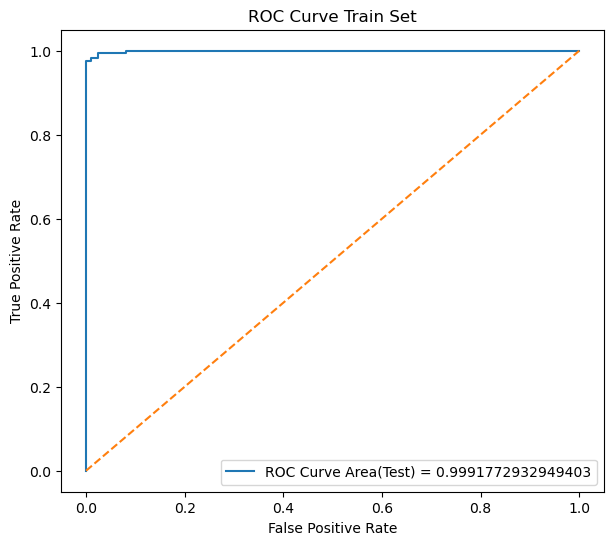

Confusion Matrix for Test Data
[[69  2]
 [ 4 38]]

Accuracy: 0.9469026548672567


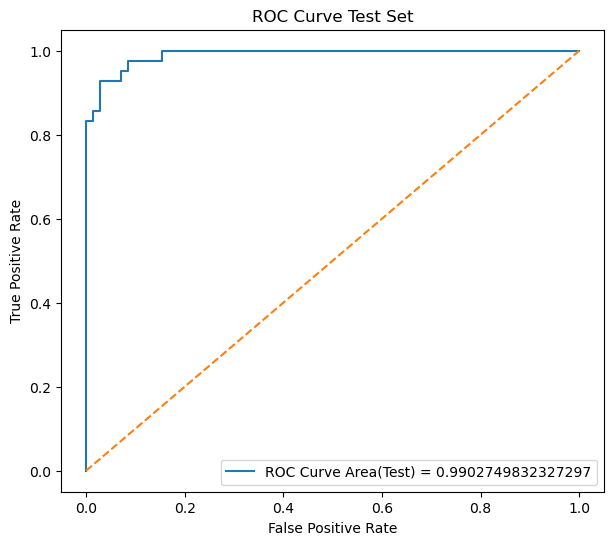

Average Scores:


,Train,Test
Average Accuracy,0.983772,0.960472
Average Precision,0.983807,0.960897
Average Recall,0.983772,0.960472
Average F1-score,0.983749,0.960366
AUC,0.998645,0.988397


In [13]:
model_summary={}
model_summary['Supervised L1 - Penalized SVM'] = svm(breastcancer_df, 30, params_grid_1b1, 'supervised')

In [14]:
print(pd.__version__)

2.1.1


#### (ii) Semi-Supervised Learning/ Self-training

##### select 50% of the positive class along with 50% of the negative class in the training set as labeled dataand the rest as unlabelled data. You can select them randomly.
#### (A) Train an L1-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation. 
#### (B) Find the unlabeled data point that is the farthest to the decision boundaryof the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data and the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs

In [15]:
def semi_supervised (train_x, train_y, args):
    
    label_indices = []
    for c in [0, 1]:
        c_idx, = np.where(train_y == c)
        idx_num = round(len(c_idx) * 0.5)
        select_idx = np.random.choice(c_idx, idx_num, replace=False)
        label_indices.extend(select_idx)
        
    unlabel_indices = []
    for idx, _ in enumerate(train_x):
        if idx not in label_indices:
            unlabel_indices.append(idx)
            
    train_x_labelled = train_x[label_indices].tolist()
    train_y_labelled = train_y.iloc[label_indices].tolist()

    train_x_unlabelled = train_x[unlabel_indices].tolist()
    train_y_unlabelled = train_y.iloc[unlabel_indices].to_numpy().tolist()
    
    model_cv = linearsvc(train_x_labelled, train_y_labelled, args)

    while len(train_x_unlabelled) > 0:
        unlabelled_scores = model_cv.decision_function(train_x_unlabelled)
        sorted_idx = np.argsort(np.abs(unlabelled_scores))
        train_x_labelled.append(train_x_unlabelled.pop(sorted_idx[-1]))
        train_y_labelled.append(train_y_unlabelled.pop(sorted_idx[-1]))
        opt_model = model_cv.best_estimator_
        opt_model.fit(train_x_labelled, train_y_labelled)
    
    return model_cv

##### (B)

In [16]:
potential_c_1b2 = np.logspace(np.log10(10 ** -2), np.log10(10 ** 7), 10)
params_grid_1b2 = {
    "C": potential_c_1b2
}


Iteration Number: 1
Accuracy Score for Train Set: 0.9956140350877193
Accuracy Score for Test Set: 0.9734513274336283
Optimal C: {'C': 10000000.0}

Iteration Number: 2
Accuracy Score for Train Set: 0.9780701754385965
Accuracy Score for Test Set: 0.9734513274336283
Optimal C: {'C': 10000.0}

Iteration Number: 3
Accuracy Score for Train Set: 0.9890350877192983
Accuracy Score for Test Set: 0.9469026548672567
Optimal C: {'C': 10000.0}

Iteration Number: 4
Accuracy Score for Train Set: 0.9956140350877193
Accuracy Score for Test Set: 0.9646017699115044
Optimal C: {'C': 100000.0}

Iteration Number: 5
Accuracy Score for Train Set: 0.9890350877192983
Accuracy Score for Test Set: 0.9646017699115044
Optimal C: {'C': 10000.0}

Iteration Number: 6
Accuracy Score for Train Set: 0.9846491228070176
Accuracy Score for Test Set: 0.9469026548672567
Optimal C: {'C': 10000.0}

Iteration Number: 7
Accuracy Score for Train Set: 0.9780701754385965
Accuracy Score for Test Set: 0.9646017699115044
Optimal C: {'C'

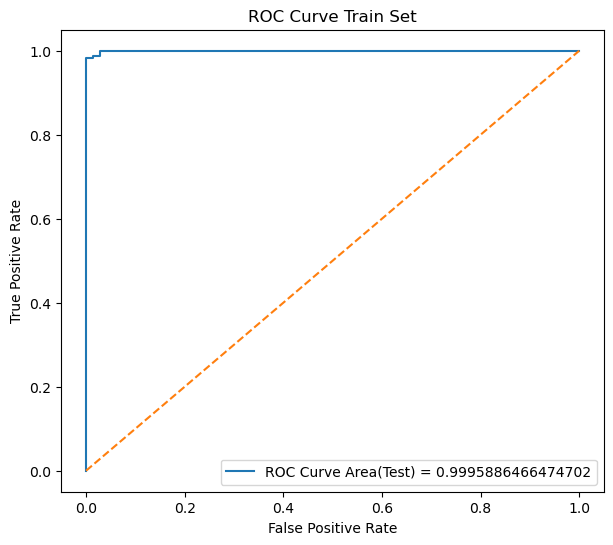

Confusion Matrix for Test Data
[[69  2]
 [ 5 37]]

Accuracy: 0.9380530973451328


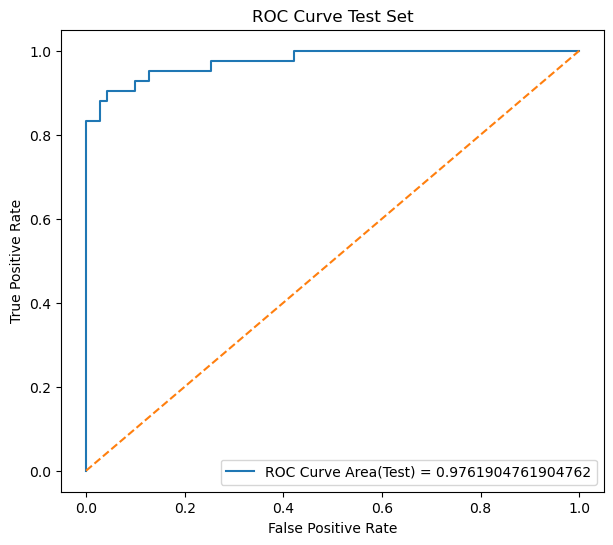

Average Scores:


,Train,Test
Average Accuracy,0.982822,0.959587
Average Precision,0.982839,0.960035
Average Recall,0.982822,0.959587
Average F1-score,0.982797,0.959450
AUC,0.998550,0.987827


In [17]:
model_summary['Semi-supervised L1 - Penalized SVM'] = svm(breastcancer_df, 30, params_grid_1b2, 'semisupervised')

#### (iii) Unsupervised Learning
#### Run k-means algorithm on the whole trainingset. Ignore the labels of the data, and assume k = 2.
#### (A) Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?
#### (B) Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.
#### (C) Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data

#### (A) Answer
### We can set the number of iterations to make sure that the algorithm does not get trapped in a local minimum

In [18]:
def find_distance(center, X, label):
    dist = np.ndarray((X.shape[0],))
    proba_values = np.ndarray((X.shape[0], 2))
    for i, val in enumerate(X):
        current_center = center[label[i]]
        dist[i] = np.linalg.norm(val - current_center)
        proba_values[i, 0] = np.linalg.norm(val - center[0])
        proba_values[i, 1] = np.linalg.norm(val - center[1])
    prob = softmax(proba_values, axis=1).astype(np.float64)
    return dist, prob

def majority(label, dist, y_set):
    label_cluster = np.empty(2, dtype='int')
    label_majority = label.copy()
    label_cluster[:] = np.unique(label)
    for l in [0, 1]:
        idx_of_sample, = np.where(label == l)
        idx_of_sample_lst = idx_of_sample.tolist()
        idx_of_sample_lst_sorted = sorted(idx_of_sample_lst, key=lambda d : dist[d])
        top_idxs_30 = idx_of_sample_lst_sorted[:30]
        majority_label_dict = y_set.iloc[top_idxs_30].value_counts().to_dict() 
        majority_label_val = list(majority_label_dict.keys())[0]
        label_majority[idx_of_sample] = majority_label_val
        label_cluster[majority_label_val] = l
    return label_cluster, label_majority



In [19]:
def montecarlo_kmeans(dataset, num_iterations, algo):
    result_cols = ["Average Accuracy", "Average Precision", "Average Recall", "Average F1-score", "AUC"]
    result_train = pd.DataFrame(columns=result_cols)
    result_test = pd.DataFrame(columns=result_cols)
    
    for i in range(num_iterations):
        train_x, train_y, test_x, test_y = split_df(breastcancer_df, random_state=i)
        train_x, test_x = normalize(train_x, test_x)

        
        if algo == 'kmeans':
            clustering_model = KMeans(n_clusters=2, n_init = 15, random_state=i).fit(train_x) 
            cluster_centers = clustering_model.cluster_centers_
        elif algo == 'clustering':
            help_model = SpectralClustering(n_clusters=2, 
                                            assign_labels='kmeans', 
                                            affinity='rbf', 
                                            eigen_tol = 1e-2, 
                                            eigen_solver = 'arpack', 
                                            random_state=0).fit_predict(train_x)
            cluster_centers = []
            label = [0, 1]
            for c in label:
                cent = np.mean(train_x[help_model == c], axis = 0)
                cent_lst = list(cent)
                cluster_centers.append(cent_lst)    
            clustering_model = KNeighborsClassifier(n_neighbors=1)
            clustering_model.fit(train_x, help_model)
        
        label_clust_train = clustering_model.predict(train_x)
        distances_train, ypred_train_prob = find_distance(cluster_centers, train_x, label_clust_train)
        label_cluster, ypred_train = majority(label_clust_train, distances_train, train_y)  
        cluster_positive = label_cluster[0]
        ypred_train_prob = ypred_train_prob[:, cluster_positive]
        result_train_vals, report_train = get_metrics(train_y, ypred_train, ypred_train_prob)
        result_train = pd.concat([result_train, pd.DataFrame([result_train_vals])], ignore_index=True)
        
        label_clust_test = clustering_model.predict(test_x)
        distances_test, ypred_test_prob = find_distance(cluster_centers, test_x, label_clust_test)
        label_clust, ypred_test = majority(label_clust_test, distances_test, test_y)
        cluster_positive = label_clust[0]
        ypred_test_prob = ypred_test_prob[:, cluster_positive]
        result_test_vals, report_test = get_metrics(test_y, ypred_test, ypred_test_prob)
        result_test = pd.concat([result_test, pd.DataFrame([result_test_vals])], ignore_index=True)
        
        accuracy_train = report_train["accuracy"]
        accuracy_test = report_test["accuracy"]
        
        
        print("Iteration Number: " + str(i+1))
        print("Accuracy Score for Train Set:",accuracy_train)
        print("Accuracy Score for Test Set:",accuracy_test)
        
        print()
    summary = summarize_results(train_y, ypred_train, ypred_train_prob, test_y, ypred_test, ypred_test_prob, result_train, result_test)
    display(summary)
    return summary

Iteration Number: 1
Accuracy Score for Train Set: 0.8881578947368421
Accuracy Score for Test Set: 0.8761061946902655

Iteration Number: 2
Accuracy Score for Train Set: 0.8706140350877193
Accuracy Score for Test Set: 0.9557522123893806

Iteration Number: 3
Accuracy Score for Train Set: 0.8969298245614035
Accuracy Score for Test Set: 0.8495575221238938

Iteration Number: 4
Accuracy Score for Train Set: 0.8859649122807017
Accuracy Score for Test Set: 0.911504424778761

Iteration Number: 5
Accuracy Score for Train Set: 0.8991228070175439
Accuracy Score for Test Set: 0.8761061946902655

Iteration Number: 6
Accuracy Score for Train Set: 0.8859649122807017
Accuracy Score for Test Set: 0.8672566371681416

Iteration Number: 7
Accuracy Score for Train Set: 0.8793859649122807
Accuracy Score for Test Set: 0.8938053097345132

Iteration Number: 8
Accuracy Score for Train Set: 0.8859649122807017
Accuracy Score for Test Set: 0.8672566371681416

Iteration Number: 9
Accuracy Score for Train Set: 0.88815

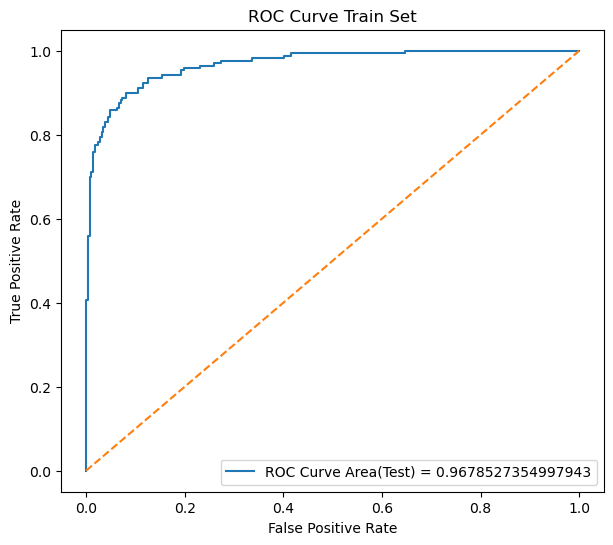

Confusion Matrix for Test Data
[[70  1]
 [17 25]]

Accuracy: 0.8407079646017699


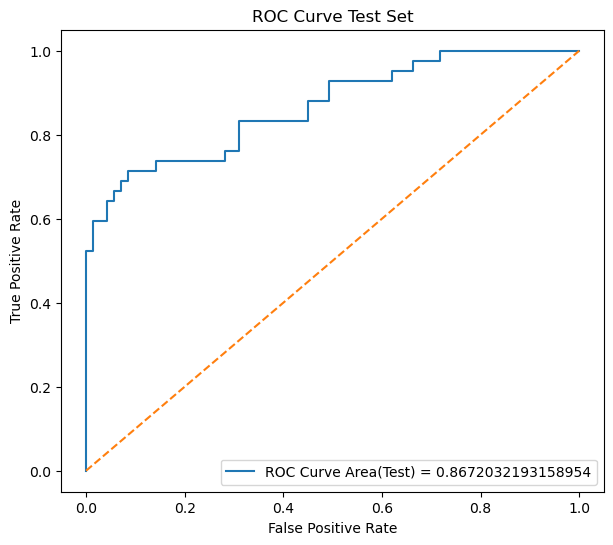

Average Scores:


,Train,Test
Average Accuracy,0.887792,0.882301
Average Precision,0.896542,0.894138
Average Recall,0.887792,0.882301
Average F1-score,0.883912,0.877143
AUC,0.950710,0.945864


In [20]:
model_summary['K-Means Clustering'] = montecarlo_kmeans(breastcancer_df, 30, 'kmeans')

#### (iv) Spectral Clustering

####  Repeat 1(b)iii using spectral clustering, which is clustering based on kernels. Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters . Instead, use fit − predict method.

Iteration Number: 1
Accuracy Score for Train Set: 0.8859649122807017
Accuracy Score for Test Set: 0.8849557522123894

Iteration Number: 2
Accuracy Score for Train Set: 0.868421052631579
Accuracy Score for Test Set: 0.9203539823008849

Iteration Number: 3
Accuracy Score for Train Set: 0.8925438596491229
Accuracy Score for Test Set: 0.8407079646017699

Iteration Number: 4
Accuracy Score for Train Set: 0.8793859649122807
Accuracy Score for Test Set: 0.8761061946902655

Iteration Number: 5
Accuracy Score for Train Set: 0.8837719298245614
Accuracy Score for Test Set: 0.8761061946902655

Iteration Number: 6
Accuracy Score for Train Set: 0.8837719298245614
Accuracy Score for Test Set: 0.8761061946902655

Iteration Number: 7
Accuracy Score for Train Set: 0.8728070175438597
Accuracy Score for Test Set: 0.8938053097345132

Iteration Number: 8
Accuracy Score for Train Set: 0.8837719298245614
Accuracy Score for Test Set: 0.8495575221238938

Iteration Number: 9
Accuracy Score for Train Set: 0.88596

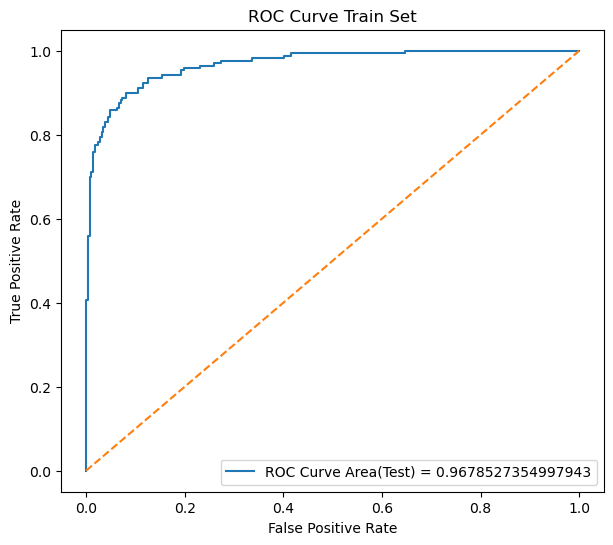

Confusion Matrix for Test Data
[[69  2]
 [18 24]]

Accuracy: 0.8230088495575221


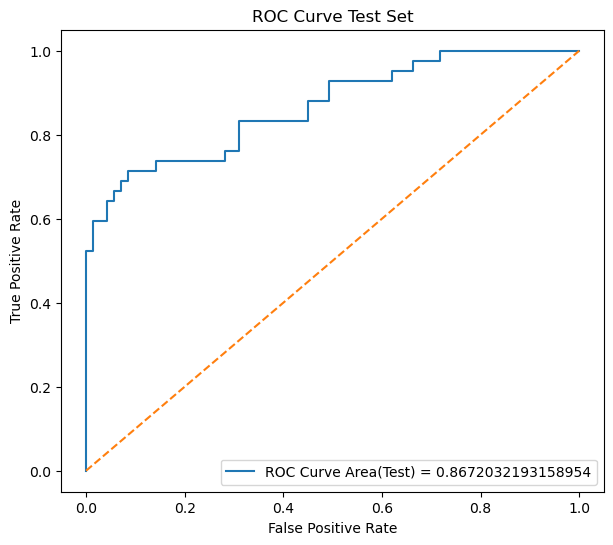

Average Scores:


,Train,Test
Average Accuracy,0.882895,0.871681
Average Precision,0.893003,0.885106
Average Recall,0.882895,0.871681
Average F1-score,0.878464,0.865377
AUC,0.950143,0.945260


In [21]:
model_summary['Spectral Clustering'] = montecarlo_kmeans(breastcancer_df, 30, 'clustering')

#### (iv) Compare

#### One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.

In [22]:
print(model_summary.items())

dict_items([('Supervised L1 - Penalized SVM',                       Train      Test
Average Accuracy   0.983772  0.960472
Average Precision  0.983807  0.960897
Average Recall     0.983772  0.960472
Average F1-score   0.983749  0.960366
AUC                0.998645  0.988397), ('Semi-supervised L1 - Penalized SVM',                       Train      Test
Average Accuracy   0.982822  0.959587
Average Precision  0.982839  0.960035
Average Recall     0.982822  0.959587
Average F1-score   0.982797  0.959450
AUC                0.998550  0.987827), ('K-Means Clustering',                       Train      Test
Average Accuracy   0.887792  0.882301
Average Precision  0.896542  0.894138
Average Recall     0.887792  0.882301
Average F1-score   0.883912  0.877143
AUC                0.950710  0.945864), ('Spectral Clustering',                       Train      Test
Average Accuracy   0.882895  0.871681
Average Precision  0.893003  0.885106
Average Recall     0.882895  0.871681
Average F1-score   0.87846

In [23]:
for k, v in model_summary.items():
    print()
    print(k)
    print()
    print(v)
    


Supervised L1 - Penalized SVM

                      Train      Test
Average Accuracy   0.983772  0.960472
Average Precision  0.983807  0.960897
Average Recall     0.983772  0.960472
Average F1-score   0.983749  0.960366
AUC                0.998645  0.988397

Semi-supervised L1 - Penalized SVM

                      Train      Test
Average Accuracy   0.982822  0.959587
Average Precision  0.982839  0.960035
Average Recall     0.982822  0.959587
Average F1-score   0.982797  0.959450
AUC                0.998550  0.987827

K-Means Clustering

                      Train      Test
Average Accuracy   0.887792  0.882301
Average Precision  0.896542  0.894138
Average Recall     0.887792  0.882301
Average F1-score   0.883912  0.877143
AUC                0.950710  0.945864

Spectral Clustering

                      Train      Test
Average Accuracy   0.882895  0.871681
Average Precision  0.893003  0.885106
Average Recall     0.882895  0.871681
Average F1-score   0.878464  0.865377
AUC           

#### Supervised model performs better than semi-supervised models and unsupervised models.
#### semi-supervised models perform better than unsupervised models.
#### Results of supervised and semi-supervised approaches don't differ significantly, but there are noticeable differences when compared to unsupervised models.
#### Results are justified by the fact that supervised models make use of labels, providing more information for predictions. Semi-supervised models have less information, while unsupervised models rely on unlabeled data and feature similarity.

## 2. Active Learning Using Support Vector Machines

### (a) Download the banknote authentication Data Set

In [24]:

bankauth_df = pd.read_csv("../data/data_banknote_authentication.txt", header=None)
bankauth_df.columns = ['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class']
bankauth_df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [25]:
rows = bankauth_df.shape[0]
test_size = 472
test_bankauth_indices = np.random.choice(rows, size=test_size, replace=False)

train_bankauth_indices  = np.setdiff1d(np.arange(rows), test_bankauth_indices)

train_bankauth = bankauth_df.iloc[train_bankauth_indices]
test_bankauth = bankauth_df.iloc[test_bankauth_indices]

In [26]:
##bankauth
def bankauth_df_split(bankauth_df):
    num_rows = bankauth_df.shape[0]
    train_indices = []
    test_indices = []
    test_indices = np.random.choice(num_rows, size=472, replace=False)
    for idx in range(num_rows):
        if idx not in test_indices:
            train_indices.append(idx)
    train_indices = np.array(train_indices)
    train_bankauth = bankauth_df.iloc[train_indices]
    test_bankauth = bankauth_df.iloc[test_indices]
    #train_x_bankauth = train_bankauth.iloc[:, :-1]
    #train_y_bankauth = train_bankauth.iloc[:, -1]
    #test_x_bankauth = test_bankauth.iloc[:, :-1]
    #test_y_bankauth = test_bankauth.iloc[:, -1]
    return train_bankauth,test_bankauth 

In [27]:
train_bankauth,test_bankauth=bankauth_df_split(bankauth_df)
train_bankauth

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.80730,-0.44699,0
4,0.32924,-4.45520,4.57180,-0.98880,0
5,4.36840,9.67180,-3.96060,-3.16250,0
7,2.09220,-6.81000,8.46360,-0.60216,0
8,3.20320,5.75880,-0.75345,-0.61251,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.45010,-0.55949,1
1368,-1.38870,-4.87730,6.47740,0.34179,1
1369,-3.75030,-13.45860,17.59320,-2.77710,1
1370,-3.56370,-8.38270,12.39300,-1.28230,1


In [28]:
test_bankauth

,Variance,Skewness,Curtosis,Entropy,Class
1091,-1.71010,-8.7903,7.97350,-0.45475,1
933,-0.10234,1.8189,-2.21690,-0.56725,1
182,-0.69572,8.6165,1.84190,-4.32890,0
973,1.23090,3.8923,-4.82770,-4.00690,1
82,5.01850,8.5978,-2.93750,-1.28100,0
...,...,...,...,...,...
108,3.10600,9.5414,-4.25360,-4.00300,0
902,-2.89570,-12.0205,11.91490,-2.75520,1
584,0.33565,6.8369,0.69718,-0.55691,0
231,-2.33610,11.9604,3.08350,-5.44350,0


### (b) Repeat each of the following two procedures 50 times

#### (i) Passive

In [33]:

def passive_learning(train_x, train_y, test_x, test_y, kwargs):
    all_indices = np.arange(train_x.shape[0])
    new_indices, accuracy = [], []
    while len(all_indices) > 0:
        np.random.shuffle(all_indices)
        pool, all_indices = all_indices[:10], all_indices[10:]
        new_indices.extend(pool)
        
        new_train_x, new_train_y = train_x.iloc[new_indices], train_y.iloc[new_indices]
        model_cv = GridSearchCV(estimator = LinearSVC(penalty = 'l1', dual = False), **kwargs)
        model_cv.fit(new_train_x, new_train_y)
        preds = model_cv.predict(test_x)
        result = classification_report(test_y, preds, output_dict = True)
        accuracy.append(result['accuracy'])
    return accuracy

def active_learning(train_x, train_y, test_x, test_y, kwargs):
    all_indices = np.arange(train_x.shape[0])
    new_indices, accuracy = [], []
    np.random.shuffle(all_indices)
    pool, all_indices = all_indices[:10], all_indices[10:]
    new_indices.extend(pool)
    
    while len(new_indices) <= 900:
        new_train_x, new_train_y = train_x.iloc[new_indices], train_y.iloc[new_indices]
        model_cv = GridSearchCV(estimator = LinearSVC(penalty = 'l1', dual = False), **kwargs)
        model_cv.fit(new_train_x, new_train_y)
        preds = model_cv.predict(test_x)
        result = classification_report(test_y, preds, output_dict = True)
        accuracy.append(result['accuracy'])
        
        if len(all_indices) == 0:
            break
        
        distance = model_cv.decision_function(train_x.iloc[all_indices])
        sortedarg = np.arange(len(all_indices))
        sorted(sortedarg, key=lambda i : abs(distance[i]))
        all_indices = all_indices[sortedarg]
        pool, all_indices = all_indices[:10], all_indices[10:]
        new_indices.extend(pool)
        
    return accuracy

def montecarlo_activepassive(df, iterations, _type):
    
    learning_curve = []   
    kwargs = {
        'param_grid' : {'C' : np.logspace(-2, 7, 20)}, 
        'scoring' : 'f1_weighted',
        'n_jobs' : -1
    }
    for i in range(iterations):
        train_bankauth, test_bankauth = bankauth_df_split(df)
        train_x_bankauth, train_y_bankauth = train_bankauth.iloc[:, :-1], train_bankauth.iloc[:, -1]
        test_x_bankauth, test_y_bankauth = test_bankauth.iloc[:, :-1], test_bankauth.iloc[:, -1]
        train_x_bankauth, test_x_bankauth = normalize(train_x_bankauth, test_x_bankauth)
        train_x_bankauth, test_x_bankauth = pd.DataFrame(train_x_bankauth), pd.DataFrame(test_x_bankauth)
        kwargs['cv'] = StratifiedKFold(5, random_state = i, shuffle = True)
         
        if _type == 'passive':  
            accuracy = passive_learning(train_x_bankauth, train_y_bankauth, test_x_bankauth, test_y_bankauth, kwargs)
        else:
            accuracy = active_learning(train_x_bankauth, train_y_bankauth, test_x_bankauth, test_y_bankauth, kwargs)
        learning_curve.append(accuracy)
        accuracy_train=np.round(accuracy[0], 4)
        accuracy_test=np.round(accuracy[-1], 4)
        print("Iteration Number: " + str(i+1))
        print("Accuracy Score for Train Set:",accuracy_train)
        print("Accuracy Score for Test Set:",accuracy_test)

    learning_curve = np.mean(np.array(learning_curve), axis = 0)
    return learning_curve


In [30]:

passive_learning_curve = montecarlo_activepassive(bankauth_df, 50, 'passive')

Iteration Number: 1
Accuracy Score for Train Set: 0.5996
Accuracy Score for Test Set: 0.9936
Iteration Number: 2
Accuracy Score for Train Set: 0.7479
Accuracy Score for Test Set: 0.9894
Iteration Number: 3
Accuracy Score for Train Set: 0.9174
Accuracy Score for Test Set: 0.9915
Iteration Number: 4
Accuracy Score for Train Set: 0.8347
Accuracy Score for Test Set: 0.9958
Iteration Number: 5
Accuracy Score for Train Set: 0.9216
Accuracy Score for Test Set: 0.9894
Iteration Number: 6
Accuracy Score for Train Set: 0.8983
Accuracy Score for Test Set: 0.9979
Iteration Number: 7
Accuracy Score for Train Set: 0.8602
Accuracy Score for Test Set: 0.9894
Iteration Number: 8
Accuracy Score for Train Set: 0.8411
Accuracy Score for Test Set: 1.0
Iteration Number: 9
Accuracy Score for Train Set: 0.8623
Accuracy Score for Test Set: 0.9958
Iteration Number: 10
Accuracy Score for Train Set: 0.9597
Accuracy Score for Test Set: 0.9873
Iteration Number: 11
Accuracy Score for Train Set: 0.9703
Accuracy Score

#### (ii) Active

In [34]:
active_learning_curve = montecarlo_activepassive(bankauth_df, 50, 'active')

Iteration Number: 1
Accuracy Score for Train Set: 0.9047
Accuracy Score for Test Set: 0.9936
Iteration Number: 2
Accuracy Score for Train Set: 0.9407
Accuracy Score for Test Set: 0.9979
Iteration Number: 3
Accuracy Score for Train Set: 0.928
Accuracy Score for Test Set: 0.9852
Iteration Number: 4
Accuracy Score for Train Set: 0.7542
Accuracy Score for Test Set: 1.0
Iteration Number: 5
Accuracy Score for Train Set: 0.8877
Accuracy Score for Test Set: 0.9936
Iteration Number: 6
Accuracy Score for Train Set: 0.9767
Accuracy Score for Test Set: 0.9979
Iteration Number: 7
Accuracy Score for Train Set: 0.7839
Accuracy Score for Test Set: 0.9936
Iteration Number: 8
Accuracy Score for Train Set: 0.8686
Accuracy Score for Test Set: 0.9958
Iteration Number: 9
Accuracy Score for Train Set: 0.9788
Accuracy Score for Test Set: 0.9915
Iteration Number: 10
Accuracy Score for Train Set: 0.7924
Accuracy Score for Test Set: 0.9894
Iteration Number: 11
Accuracy Score for Train Set: 0.8242
Accuracy Score 

### (c) Average the 50 test errors

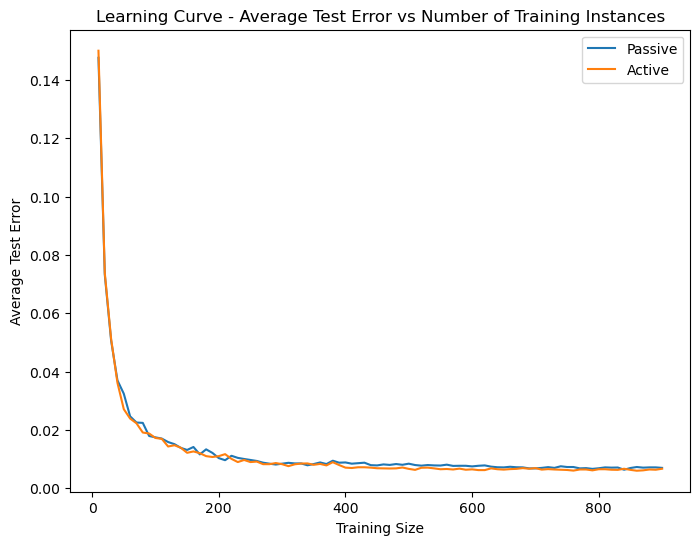

In [39]:

def learning_curve(active, passive):
    
    fig, axes = plt.subplots(figsize=(8, 6))
    x = 10 * np.arange(1, 91)
    axes.plot(x, 1 - passive, label = 'Passive')
    axes.plot(x, 1 - active, label = 'Active')
    axes.set_title("Learning Curve - Average Test Error vs Number of Training Instances")
    axes.set_xlabel("Training Size")
    axes.set_ylabel("Average Test Error")
    axes.legend()
    plt.show()
learning_curve(active_learning_curve, passive_learning_curve)

#### Answer : 

#### Active learning chooses the most informative data points and queries for their labels. This aids in improving the accuracy of the model with fewer labeled instances. Passive learning utilizes all labelled data that is available without any selection strategy. Active learning involves focused selection and thereby decreases overfitting, reduces impact of noisy labels and improves model performance in comparison to passive learning

### References

#### https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
#### https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#### https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
#### https://machinelearningmastery.com/what-is-semi-supervised-learning/
#### https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html
#### https://www.geeksforgeeks.org/passive-and-active-learning-in-machine-learning/
#### https://stackoverflow.com/questions/75956209/error-dataframe-object-has-no-attribute-append
#### https://stackoverflow.com/questions/53784971/how-to-disable-convergencewarning-using-sklearn
#### https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
#### https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html